In [23]:
import pymc3 as pm
import theano
import numpy as np
import arviz as az
import matplotlib.pyplot as plt
# Distributions
from scipy.stats import expon

In [24]:
exponential_data = expon(scale=0.5).rvs(50)

Initializing SMC sampler...
Multiprocess sampling (4 chains in 4 jobs)
Stage:   0 Beta: 0.028
Stage:   1 Beta: 0.211
Stage:   2 Beta: 1.000
Stage:   0 Beta: 0.029
Stage:   1 Beta: 0.217
Stage:   2 Beta: 1.000
Stage:   0 Beta: 0.032
Stage:   1 Beta: 0.233
Stage:   2 Beta: 1.000
Stage:   0 Beta: 0.030
Stage:   1 Beta: 0.227
Stage:   2 Beta: 1.000


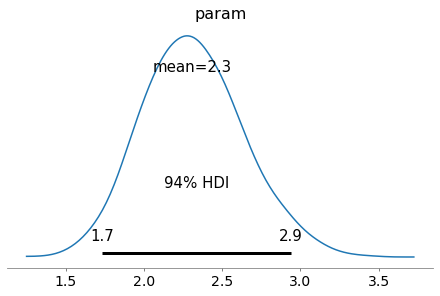

In [25]:
with pm.Model() as model_g:
    param = pm.HalfNormal('param',sigma=10)
    y = pm.Exponential('y',lam=param, observed=exponential_data)
    trace_g = pm.sample(2000, progre)
    az.plot_posterior(trace_g)

C:\Users\carlo\miniconda3\envs\bayesianStats\lib\site-packages\arviz\data\io_pymc3.py:89: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([<AxesSubplot:title={'center':'param'}>], dtype=object)

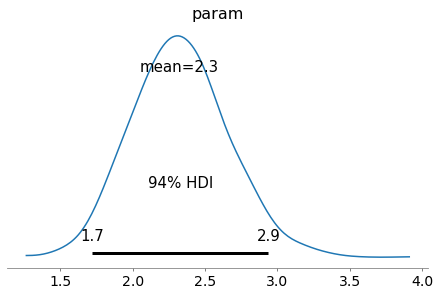

In [4]:
az.plot_posterior(trace_g)

In [5]:
np.average(exponential_data)

0.4395348258870311

In [6]:
np.divide(1,range(1,14))

array([1.        , 0.5       , 0.33333333, 0.25      , 0.2       ,
       0.16666667, 0.14285714, 0.125     , 0.11111111, 0.1       ,
       0.09090909, 0.08333333, 0.07692308])

Initializing SMC sampler...
Multiprocess sampling (4 chains in 4 jobs)
Stage:   0 Beta: 0.016
Stage:   1 Beta: 0.139
Stage:   2 Beta: 1.000
Stage:   0 Beta: 0.017
Stage:   1 Beta: 0.139
Stage:   2 Beta: 1.000
Stage:   0 Beta: 0.014
Stage:   1 Beta: 0.134
Stage:   2 Beta: 0.996
Stage:   3 Beta: 1.000
Stage:   0 Beta: 0.015
Stage:   1 Beta: 0.129
Stage:   2 Beta: 1.000


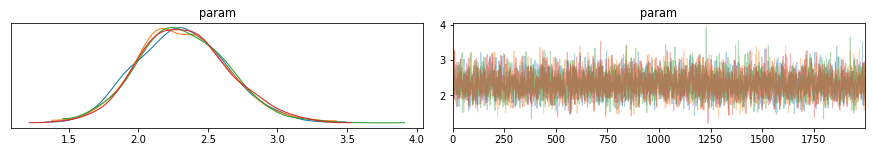

In [7]:
with pm.Model() as model_g:
    param = pm.HalfCauchy('param',beta=10)
    y = pm.Exponential('y',lam=param, observed=exponential_data)
    trace_cauchy = pm.sample_smc(2000)
    az.plot_trace(trace_cauchy)

C:\Users\carlo\miniconda3\envs\bayesianStats\lib\site-packages\arviz\data\io_pymc3.py:89: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([<AxesSubplot:title={'center':'param'}>], dtype=object)

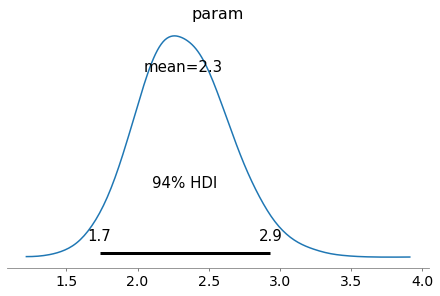

In [8]:
az.plot_posterior(trace_cauchy)

Initializing SMC sampler...
Multiprocess sampling (4 chains in 4 jobs)
Stage:   0 Beta: 0.323
Stage:   1 Beta: 1.000
Stage:   0 Beta: 0.313
Stage:   1 Beta: 1.000
Stage:   0 Beta: 0.331
Stage:   1 Beta: 1.000
Stage:   0 Beta: 0.347
Stage:   1 Beta: 1.000


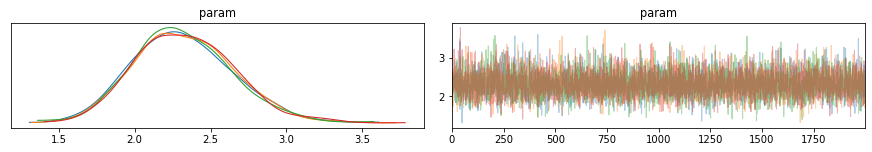

In [9]:
with pm.Model() as model_g:
    param = pm.Uniform('param',lower=1, upper=5)
    y = pm.Exponential('y',lam=param, observed=exponential_data)
    trace_uniform = pm.sample_smc(2000)
    az.plot_trace(trace_uniform)

C:\Users\carlo\miniconda3\envs\bayesianStats\lib\site-packages\arviz\data\io_pymc3.py:89: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([<AxesSubplot:title={'center':'param'}>], dtype=object)

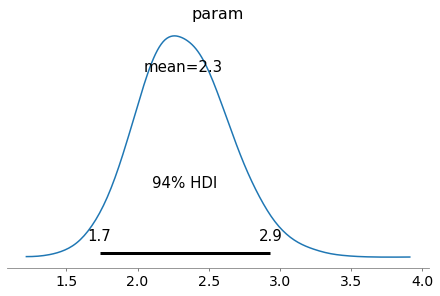

In [10]:
az.plot_posterior(trace_cauchy)

Initializing SMC sampler...
Multiprocess sampling (4 chains in 4 jobs)
Stage:   0 Beta: 0.073
Stage:   1 Beta: 0.352
Stage:   2 Beta: 1.000
Stage:   0 Beta: 0.067
Stage:   1 Beta: 0.326
Stage:   2 Beta: 1.000
Stage:   0 Beta: 0.067
Stage:   1 Beta: 0.337
Stage:   2 Beta: 1.000
Stage:   0 Beta: 0.064
Stage:   1 Beta: 0.324
Stage:   2 Beta: 1.000


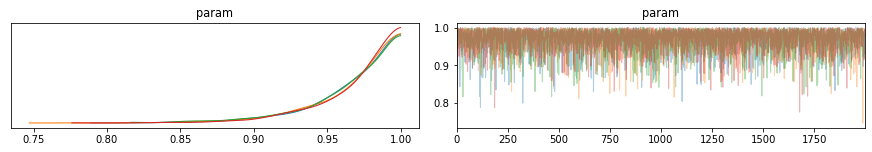

In [11]:
with pm.Model() as model_g:
    param = pm.Beta('param',alpha=1, beta=1)
    y = pm.Exponential('y',lam=param, observed=exponential_data)
    trace_beta = pm.sample_smc(2000)
    az.plot_trace(trace_beta)

C:\Users\carlo\miniconda3\envs\bayesianStats\lib\site-packages\arviz\data\io_pymc3.py:89: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([<AxesSubplot:title={'center':'param'}>], dtype=object)

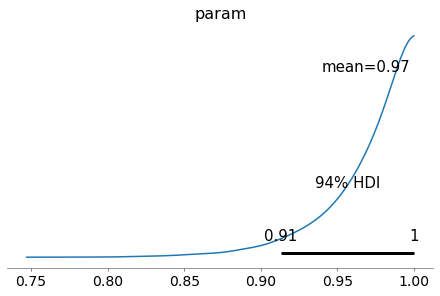

In [12]:
az.plot_posterior(trace_beta)

In [13]:
likelihood_using_beta  = np.exp(trace_beta.report.log_marginal_likelihood)
print(np.average(likelihood_using_beta))

9.779522000283298e-12


In [14]:
likelihood_using_normal  = np.exp(trace_g.report.log_marginal_likelihood)
print(np.average(likelihood_using_normal))

8.537845822292031e-06


In [15]:
likelihood_using_cauchy  = np.exp(trace_cauchy.report.log_marginal_likelihood)
print(np.average(likelihood_using_cauchy))

6.920262093588184e-06


In [16]:
np.divide(np.average(likelihood_using_cauchy),np.average(likelihood_using_beta))

707627.8465744762

In [17]:
np.divide(np.average(likelihood_using_normal),np.average(likelihood_using_beta))

873033.0400652202

In [18]:
np.divide(np.average(likelihood_using_normal),np.average(likelihood_using_cauchy))

1.2337460210072944

In [19]:
1/1.5

0.6666666666666666

In [20]:
np.divide(1,np.average(expon(scale=2/3-0.1).rvs(50)))

1.6936952524563078

In [21]:
1/(2/3-0.1)

1.7647058823529411